# Reduced One-form Thrombin Activation

#### Author(s):  Ross Rhodes
#### Reference: [BIOMD0000000363](https://www.ebi.ac.uk/biomodels-main/BIOMD0000000363) | [Download](https://cpi-catalog.000webhostapp.com/cpi-files/thrombin_activation_reduced.cpi)

An approach to modeling the transition of Prothombin to Thrombin, accounting for the enzyme involved.

Forming part of the blood clotting process, the Thrombin Activation process models the decay of Prothombin which subsequently leads to the production of Thrombin. Two intermediary substances exist in the process: Meizothrombin and Prethrombin-2. Prethrombin-2 accounts for a small proportion of the total concentration in the model, whilst Meizothrombin peaks at the early stages before beginning to decay.

In [1]:
%matplotlib notebook

In [2]:
import sys
sys.path.append('..')
from CPiSimulate import CPi

In [3]:
cpi_model = CPi.ReadCPiFile('thrombin_activation_reduced')

Select the model: thrombin_activation_reduced
The processes in this cpi model are:
Pi


## Code

In [5]:
ode_def = cpi_model.view_processdef('Pi')

The cpi definitions of selected file are:

---------------------

-- BIOMD0000000357

-- Lee's Reduced Thrombin Activation, 2010

-- cPi model created by Ross Rhodes

---------------------



species E(a) = {t-u@4.7, t-r@82.4} a<u,r>.t.E(a);

species P(b,c) = b(x,y).(x.P(b,c) + y.M(b)) + c(x,y).(x.P(b,c) + y.P2(c));

species M(b) = b(x,y).(x.M(b) + y.T());

species T() = tau<0.0>.T();

species P2(c) = c(x,y).(x.P2(c) + y.T());



process Pi = [1.5E-4] E(a) || [1.0] P(b,c) || [0.0] M(b) || [0.0] T() || [0.0] P2(c): {a-b@91.8, a-c@5.16};



## Plot

Time Start: 0.0, Time End: 900.0, Number of Times: 9000.


<IPython.core.display.Javascript object>


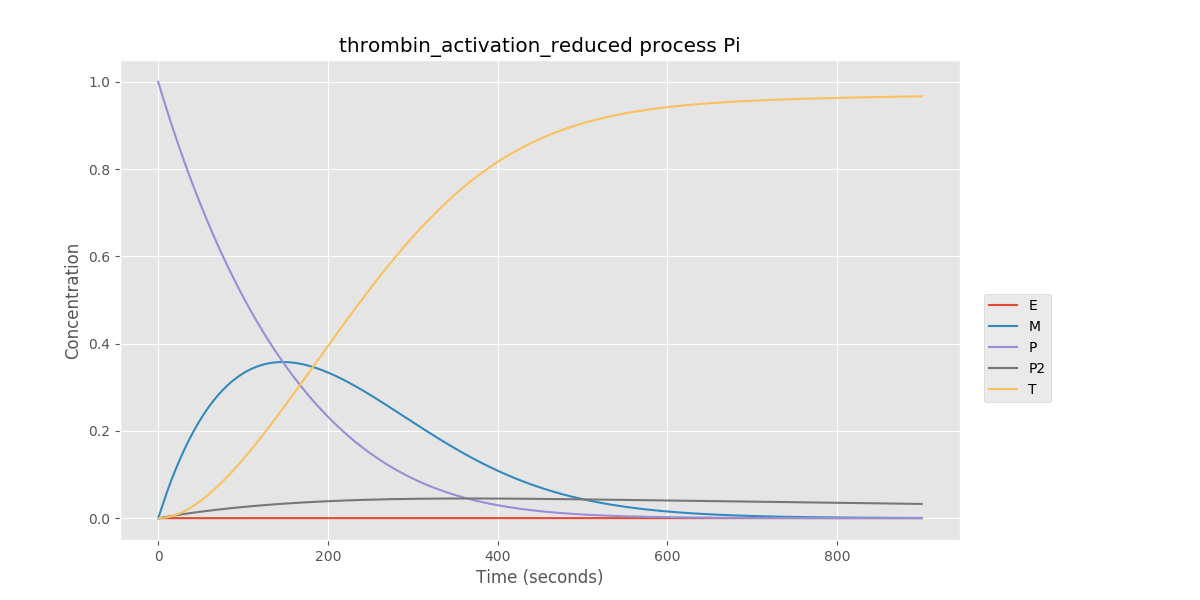

Picture will not be saved or you can change your selection.


In [5]:
solution = cpi_model.simulate_process('Pi','odeint', 0, 900, 9000)
solution.show_plot()